In [1]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor

In [2]:
boston = load_boston()

In [95]:
x = pd.DataFrame(boston.data)
x.columns = boston.feature_names
y=pd.DataFrame(boston.target)
y.columns=['MEDV']

Попробуем предсказать значение MEDV для полного датасета 

In [96]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [84]:
model = DecisionTreeRegressor(max_depth=2)

In [85]:
model.fit(x_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=2,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [86]:
y_pred = model.predict(x_test)

In [87]:
rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
print(model.score(x_test, y_test))
print(rmse)

0.5654596342597229
5.894648134627109


In [89]:
criterion = ['mse', 'friedman_mse', 'mae']
splitter = ['best', 'random']


dict_full = {}
for crit in criterion:
    dict_split = {}
    print(f'Criterion: {crit}')
    for split in splitter:
        print(f' Splitter: {split}')
        for depth in range (3,10):
            print(f'   Tree depth: {depth}')
            res = []
            model = DecisionTreeRegressor(criterion=crit, splitter=split, max_depth=depth)
            model.fit(x_train, y_train)
            score = model.score(x_test, y_test)
            print(f'     Model score: {score}')
            res.append(score)
            y_pred = model.predict(x_test)
            rmse = np.sqrt(mean_squared_error(y_test, y_pred))
            res.append(rmse)
            print(f'     Model rmse: {rmse}')
            dict_depth[depth] = res
        dict_split[split] = dict_depth
    dict_full[crit] = dict_split


Criterion: mse
 Splitter: best
   Tree depth: 3
     Model score: 0.650729914892964
     Model rmse: 5.28473869482761
   Tree depth: 4
     Model score: 0.7162475681462626
     Model rmse: 4.763351380429844
   Tree depth: 5
     Model score: 0.7160685993379273
     Model rmse: 4.764853318115199
   Tree depth: 6
     Model score: 0.7230531388707584
     Model rmse: 4.705882151393174
   Tree depth: 7
     Model score: 0.7037412686234873
     Model rmse: 4.8671911507618075
   Tree depth: 8
     Model score: 0.7417517299161258
     Model rmse: 4.544242863752973
   Tree depth: 9
     Model score: 0.698184403237146
     Model rmse: 4.91262555187526
 Splitter: random
   Tree depth: 3
     Model score: 0.4558163571073307
     Model rmse: 6.596530353614514
   Tree depth: 4
     Model score: 0.6525041981894417
     Model rmse: 5.271298433852888
   Tree depth: 5
     Model score: 0.571869104053319
     Model rmse: 5.85101360866798
   Tree depth: 6
     Model score: 0.5643157741993152
     Model r

лучшие показатели модели достигаются при следующих параметрах:
Criterion: mse
Splitter: best
Tree depth: 8

Результаты:
     Model score: 0.7417517299161258
     Model rmse: 4.544242863752973 

In [103]:
model.feature_importances_

array([0.13478476, 0.01608115, 0.02211776, 0.0212766 , 0.01400297,
       0.42345374, 0.04705591, 0.01311232, 0.02315685, 0.01627907,
       0.01019297, 0.05329045, 0.20519545])

<function matplotlib.pyplot.show(*args, **kw)>

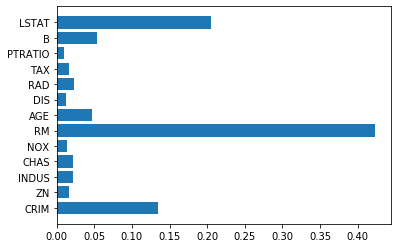

In [104]:
plt.barh(np.arange(len(model.feature_importances_)), model.feature_importances_)
plt.yticks(np.arange(len(x.columns)),x.columns)
plt.show